### Load packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
import matplotlib.cbook
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


### Read in data

In [2]:
to = pd.read_csv("turnover.csv")
print(to.shape)

(14999, 10)


The data set has 14999 records and 10 columns.

Let's glimpse the data set!

In [3]:
# general information about the data set
print(to.info())
# check the first 5 rows
to.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       13599 non-null float64
last_evaluation          14988 non-null float64
number_project           14998 non-null float64
average_montly_hours     14996 non-null float64
time_spend_company       14998 non-null float64
Work_accident            14996 non-null float64
left                     14998 non-null float64
promotion_last_5years    14998 non-null float64
sales                    14998 non-null object
salary                   14998 non-null object
dtypes: float64(8), object(2)
memory usage: 1.1+ MB
None


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.72,0.99,3.0,143.0,4.0,0.0,0.0,0.0,sales,low
1,0.62,0.87,6.0,169.0,2.0,1.0,0.0,0.0,sales,medium
2,0.84,0.99,4.0,262.0,6.0,0.0,1.0,0.0,accounting,medium
3,0.21,0.76,6.0,219.0,4.0,1.0,0.0,0.0,sales,medium
4,0.52,0.38,2.0,103.0,3.0,0.0,0.0,0.0,support,medium


The data contains:
1. **continuous variables (3)**: satisfaction_level, last_evaluation, average_monthly_hours
2. **factor variables (7)**: number_project, time_spend_company, Work_accident, left, promotion_last_5years, sales (department), salary

### Check missing values

In [4]:
count = to.isnull().sum().sort_values(ascending=False)
percent = (to.isnull().sum()/to.isnull().count()).sort_values(ascending=False)
missing_values = pd.concat([count,percent], axis=1,  keys=["Count","Percent"])
missing_values

,Count,Percent
satisfaction_level,1400,0.093340
last_evaluation,11,0.000733
Work_accident,3,0.000200
average_montly_hours,3,0.000200
salary,1,0.000067
sales,1,0.000067
promotion_last_5years,1,0.000067
left,1,0.000067
time_spend_company,1,0.000067
number_project,1,0.000067


The main missing value come from the first column, satisfaction_level, about 10% of the data set.

Now have a look at the distribution of data and find a way imputing the missing values.

###  Check distribution of features and target

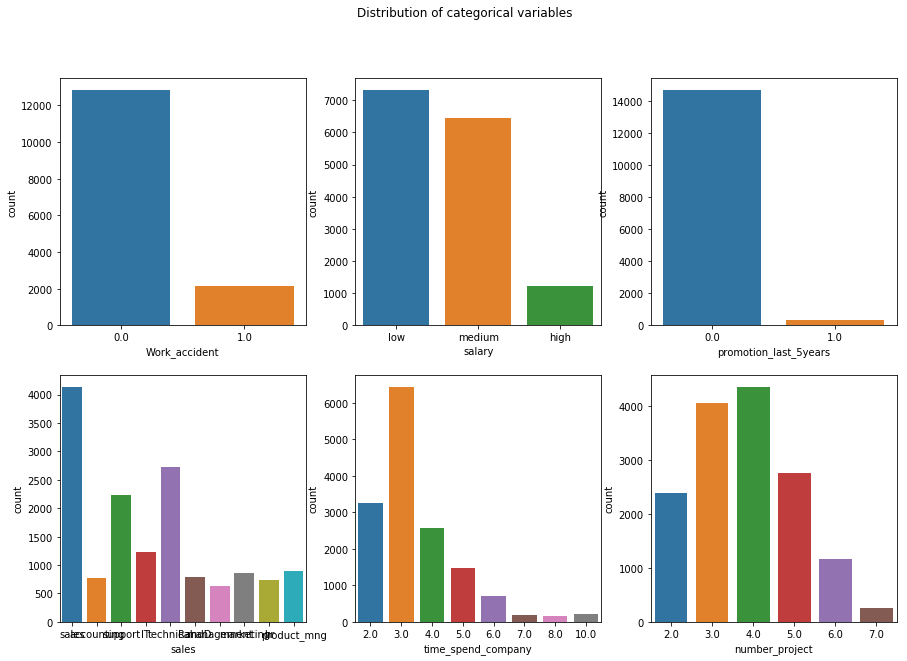

In [5]:
cat_features = ["Work_accident","salary","promotion_last_5years","sales","time_spend_company","number_project"]
num_features = ["satisfaction_level","last_evaluation","average_montly_hours"]
fig, axs =plt.subplots(2, 3, figsize=(15, 10), sharey=True)
i = 0
for feature in cat_features:
    i += 1
    ax = plt.subplot(2,3,i)
    sns.countplot(to[feature].dropna())
fig.suptitle("Distribution of categorical variables")    
plt.show()


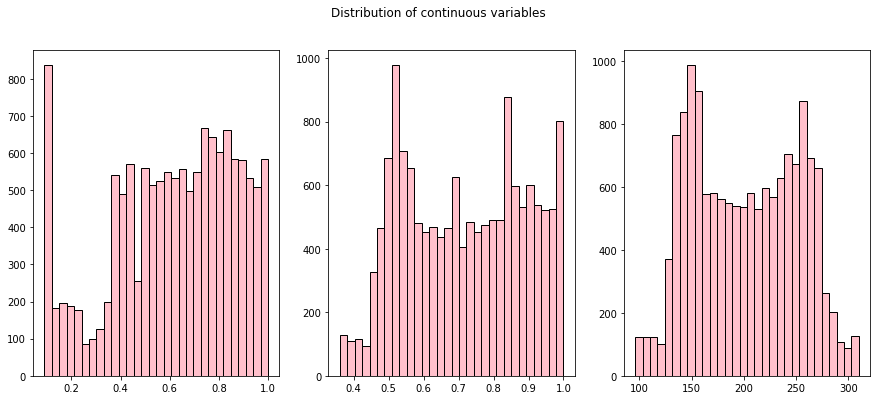

In [6]:
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)
fig, axs =plt.subplots(1, 3, figsize=(15, 6), sharey=True)
i = 0
for feature in num_features:
    i += 1
    ax = plt.subplot(1,3,i)
    ax.hist(to[feature].dropna(), bins = 30, color="pink",edgecolor="black")
fig.suptitle("Distribution of continuous variables")
plt.show()

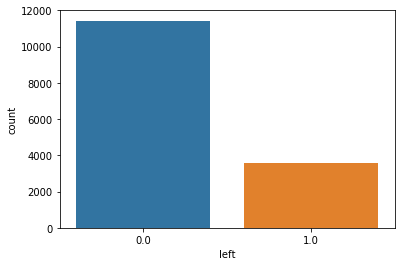

In [7]:
# Distribution of target variable
sns.countplot(to["left"].dropna())

The data in **unbalanced** with respect to target value.

### Impute missing values

Impute satisfaction_level, last_evaluation and average_monthly_hour with their **medians**

In [8]:
to["satisfaction_level"] = to["satisfaction_level"].fillna(np.median(to["satisfaction_level"].dropna()))
to["last_evaluation"] = to["last_evaluation"].fillna(np.median(to["satisfaction_level"].dropna()))
to["average_montly_hours"] = to["average_montly_hours"].fillna(np.median(to["average_montly_hours"].dropna()))

Impute categorical variables with their **"mode"** classes.

In [9]:
to["Work_accident"] = to["Work_accident"].fillna(0.0)
to["salary"] = to["salary"].fillna("low")
to["sales"] = to["sales"].fillna("sales")
to["promotion_last_5years"] = to["promotion_last_5years"].fillna(0.0)
to["number_project"] = to["number_project"].fillna(4.0)
to["time_spend_company"]= to["time_spend_company"].fillna(3.0)
to = to.dropna()

### Check the statistics of data

In [10]:
to.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000
mean,0.616840,0.716020,3.803107,201.055407,3.498266,0.144619,0.238098,0.021270
std,0.237206,0.171137,1.232616,49.940830,1.460179,0.351728,0.425934,0.144286
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.460000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.650000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.800000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Check relationship between target and features

#### 1. The number of projects and churn rate

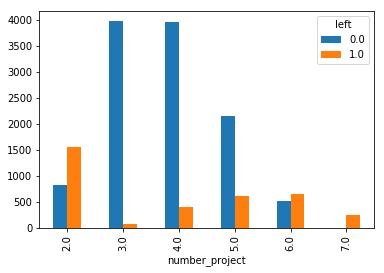

In [11]:
pd.crosstab(to["number_project"],  to["left"]).plot(kind="bar")

#### 2. Time (years) spent at company and churn rate

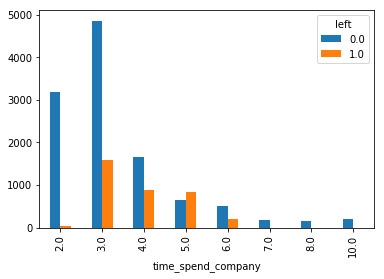

In [12]:
pd.crosstab(to["time_spend_company"],  to["left"]).plot(kind="bar")

#### 3. Work accident and churn rate

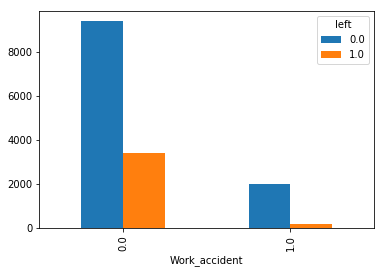

In [13]:
pd.crosstab(to["Work_accident"],  to["left"]).plot(kind="bar")

#### 4. Promotion over last 5 years and churn rate

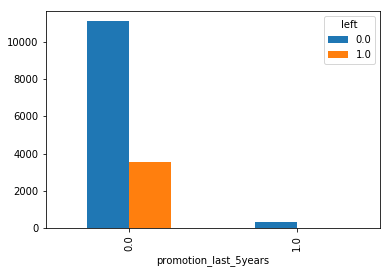

In [14]:
pd.crosstab(to["promotion_last_5years"],  to["left"]).plot(kind="bar")

#### 5. Satisfaction level and churn rate

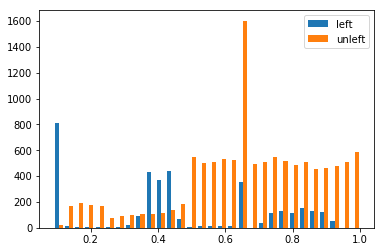

In [15]:
left = to[to.left==1]
unleft = to[to.left==0]
plt.hist([left.satisfaction_level,unleft.satisfaction_level],bins=30,label=["left","unleft"])
plt.legend()

#### 6. Last evaluation and churn rate

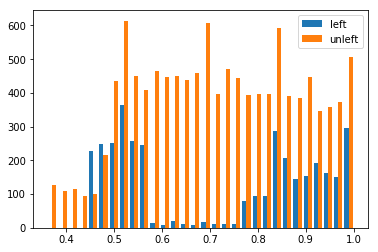

In [16]:
plt.hist([left.last_evaluation,unleft.last_evaluation],bins=30,label=["left","unleft"])
plt.legend()

#### 7. Avrage monthly working hours and churn rate

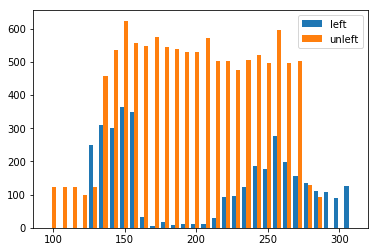

In [17]:
plt.hist([left.average_montly_hours,unleft.average_montly_hours],bins=30,label=["left","unleft"])
plt.legend()

### Heat map of variable correlations

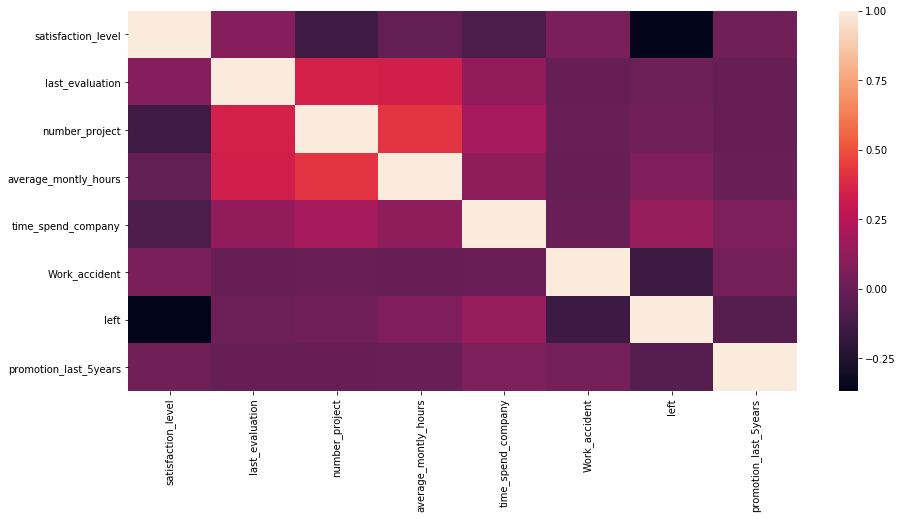

In [18]:
fig = plt.figure(figsize=(15,7))
cor_mat=to.corr()
sns.heatmap(cor_mat)
plt.show()

### Preprocess data

#### Convert "salary" and "sales" into dummies

In [19]:
salary_dummies = pd.get_dummies(to["salary"])
sales_dummies = pd.get_dummies(to["sales"])
to = pd.concat([to,salary_dummies,sales_dummies],axis=1)
to = to.drop(["sales","salary"],axis=1)

#### Get X and y

In [20]:
y = to["left"]
X = to.drop("left",axis=1)

#### Run a Monte-Carlo experient to determine the optimal n

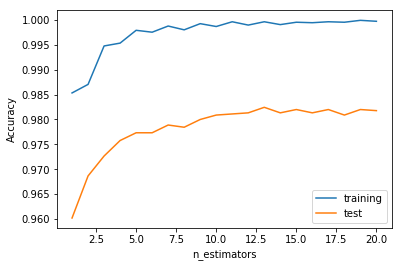

In [21]:
nmc = 10
training_score = np.zeros(nmc)
test_score = np.zeros(nmc)
mean_training_score = np.zeros(to.shape[1])
mean_test_score = np.zeros(to.shape[1])
for n in range(1,to.shape[1]+1):
    for i in range(nmc):
        X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)        
        rf = RandomForestClassifier(n_estimators=n, random_state=0).fit(X_train,y_train)       
        training_score[i] = rf.score(X_train,y_train)
        test_score[i] = rf.score(X_test, y_test)
    mean_training_score[n-1] = np.mean(training_score) 
    mean_test_score[n-1] = np.mean(test_score)
    
plt.plot(range(1,to.shape[1]+1), mean_training_score, label="training")
plt.plot(range(1,to.shape[1]+1), mean_test_score, label="test")  
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()


The optimal n is 13!

#### Check out accuracy of our best Random Forest model!

In [26]:
n=13
rf = RandomForestClassifier(n_estimators=n, random_state=0)
rf.fit(X_train,y_train)
rf.score(X_test, y_test)



0.9824444444444445

#### Check out feature importance!

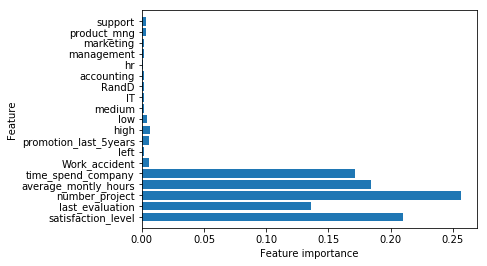

In [28]:
def plot_feature_importances_cancer(model):
    n_features = X_train.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), list(to.columns.values))
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
plot_feature_importances_cancer(rf)

It can be seen form above that the most important factor afftecting employee churn is NUMBER OF PROJECTS!